In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils

In [2]:
#loading mnist dataset
mnist = tf.keras.datasets.mnist 

In [3]:
#dividing into train and test dataset
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

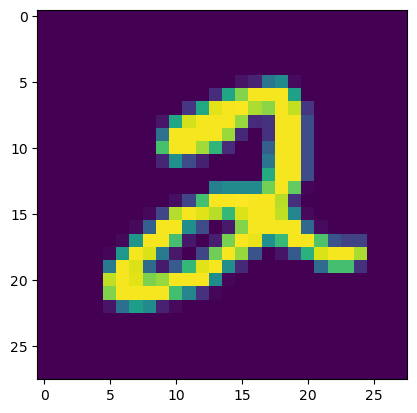

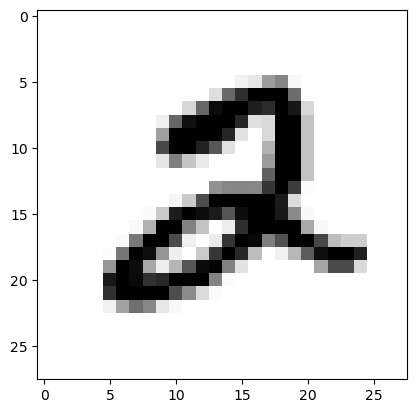

In [5]:
#Displaying the dataset
plt.imshow(x_train[5])
plt.show()
plt.imshow(x_train[5], cmap = plt.cm.binary)

In [6]:
#Checking value of each pixel before normalizing

## Grey level images varies from 0 to 255
print (x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [7]:
# Normalizing grey images in range (0,1)
x_train = x_train/255
x_test = x_test/255

In [8]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [9]:
#resizing image for convolution operation
import numpy as np
img_size = 28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training samples dimention: ",x_trainr.shape)
print("Testing samples dimention: ",x_testr.shape)

Training samples dimention:  (60000, 28, 28, 1)
Testing samples dimention:  (10000, 28, 28, 1)


In [10]:
#Applying CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#First Convoluion Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #drop values <0
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling single maximum value of 2x2 matrix

#Second Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
print("Total Training Samples: ",len(x_trainr))

Total Training Samples:  60000


In [17]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

#Training model
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)


Epoch 1/5
1313/1313 [==============================] - 51s 37ms/step - loss: 0.2648 - accuracy: 0.9171 - val_loss: 0.1425 - val_accuracy: 0.9568
Epoch 2/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0874 - accuracy: 0.9735 - val_loss: 0.0926 - val_accuracy: 0.9725
Epoch 3/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0652 - accuracy: 0.9798 - val_loss: 0.0717 - val_accuracy: 0.9770
Epoch 4/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.0628 - val_accuracy: 0.9811
Epoch 5/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0841 - val_accuracy: 0.9747


In [18]:
#If validation accuracy < accuracy ##overfitting

In [19]:
#Testing on dataset MNIT

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples: ", test_loss)
print("Validation Acccuracy on 10,000 test samples: ", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0852 - accuracy: 0.9749
Test Loss on 10,000 test samples:  0.08524386584758759
Validation Acccuracy on 10,000 test samples:  0.9749000072479248


In [20]:
predictions = model.predict([x_testr])

313/313 [==============================] - 4s 11ms/step


In [22]:
print(predictions)

[[2.4953943e-07 2.1490738e-08 1.6309448e-05 ... 9.9997294e-01
  2.5507012e-08 2.0037726e-06]
 [4.6123191e-06 4.4572976e-04 9.9845684e-01 ... 1.0736736e-03
  2.8133407e-08 1.1882253e-08]
 [8.8278694e-06 9.9968076e-01 3.5135625e-05 ... 1.8361061e-04
  6.2113975e-07 4.0426876e-06]
 ...
 [8.0372292e-11 2.2336115e-08 4.2137001e-09 ... 7.6878956e-07
  1.1553381e-07 1.8927955e-07]
 [9.4443212e-06 3.5747681e-07 7.4883772e-08 ... 2.7417889e-06
  4.2822686e-04 5.9131266e-06]
 [4.0180315e-04 1.4478127e-05 6.6254544e-04 ... 1.5554649e-08
  7.1229661e-05 5.5930883e-05]]


1


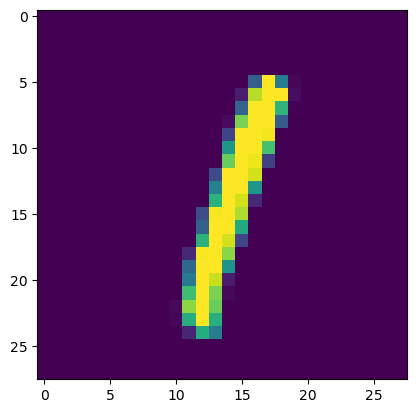

In [23]:
print(np.argmax(predictions[5])) 
plt.imshow(x_test[5])

9


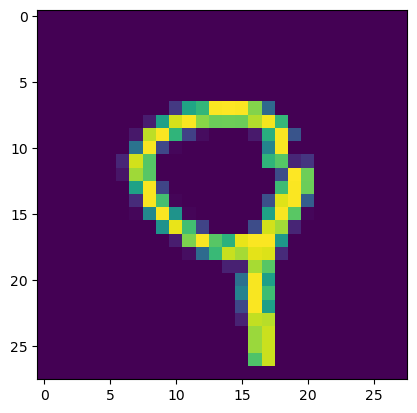

In [28]:
print(np.argmax(predictions[235])) 
plt.imshow(x_test[235])

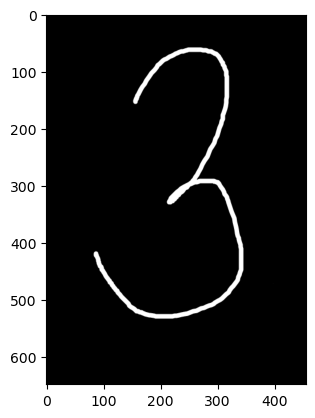

In [86]:
import cv2 
img = cv2.imread('test.png')
plt.imshow(img)

In [87]:
img.shape

(648, 455, 3)

In [88]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(648, 455)

In [89]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [90]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [91]:
newimg = np.array(newimg).reshape(-1, img_size, img_size, 1)
newimg.shape

(1, 28, 28, 1)

In [92]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 36ms/step


In [93]:
print(np.argmax(predictions))

3
